In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy

In [2]:
df=pd.read_csv('magicbricks_Ready_to_Move_Flats_50_Pages.csv')

In [3]:
df.head()

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status
0,807.0,2 BHK,Unfurnished,Bathroom 2,Sudarshan Paradise,65 Lac,NaN,Ready to Move
1,973.0,3 BHK,Unfurnished,Bathroom 3,Shapoorji Pallonji Sensorium,1.32 Cr,NaN,NaN
2,640.0,2 BHK,NaN,Bathroom 2,Forest Hills,37 Lac,7 out of 7,Ready to Move
3,894.0,2 BHK,NaN,Bathroom 2,Kundan Espacio,1.20 Cr,3 out of 13,Ready to Move
4,560.0,1 BHK,NaN,Bathroom 1,Tarangan Apartment,90 Lac,2 out of 3,Ready to Move


In [4]:
df = df.drop_duplicates()

In [5]:
df.shape

(1493, 8)

In [6]:
df.isnull().sum()

,0
Area,1
Property,0
Furnished Status,23
Bathroom,1
Society,5
Price,0
Floor,18
Status,2


In [7]:
df.describe()

,Area
count,1492.000000
mean,601.656836
std,239.208653
min,87.000000
25%,438.000000
50%,562.000000
75%,702.000000
max,3096.000000


<Axes: >

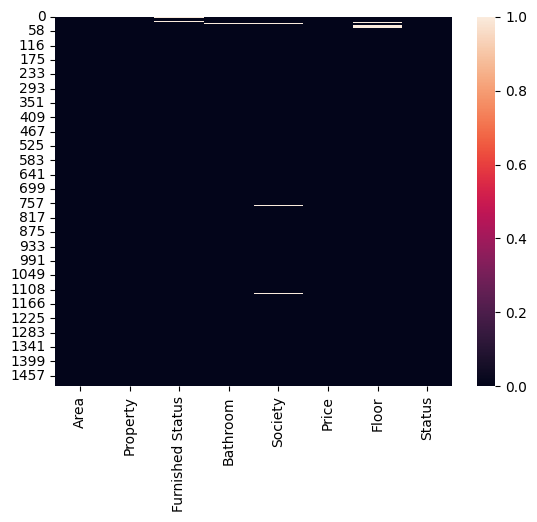

In [8]:
sns.heatmap(df.isnull())

In [9]:
# First, split the 'Floor' column on ' out of '
df[['house_floor', 'building_floor']] = df['Floor'].str.extract(r'(\d+)\s+out of\s+(\d+)')
df=df.dropna(subset=['house_floor'])
df=df.dropna(subset=['building_floor'])
# Convert new columns to numeric
df['house_floor'] = df['house_floor'].astype(int)
df['building_floor'] = df['building_floor'].astype(int)

In [10]:
def convert_cr_to_lac_clean(price):
    if isinstance(price, str):
        if 'Cr' in price:
            cr_value = float(price.split()[0])
            lac_value = cr_value * 100
            return f"{lac_value:.0f} Lac"
        elif 'Lac' in price:
            return price
    return price

df['Price'] = df['Price'].apply(convert_cr_to_lac_clean)

In [11]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status,house_floor,building_floor
2,640.0,2 BHK,NaN,Bathroom 2,Forest Hills,37 Lac,7 out of 7,Ready to Move,7,7
3,894.0,2 BHK,NaN,Bathroom 2,Kundan Espacio,120 Lac,3 out of 13,Ready to Move,3,13
4,560.0,1 BHK,NaN,Bathroom 1,Tarangan Apartment,90 Lac,2 out of 3,Ready to Move,2,3
5,1061.0,3 BHK,NaN,Bathroom 3,Ganga Serio,185 Lac,3 out of 22,Ready to Move,3,22
6,736.0,2 BHK,NaN,Bathroom 2,Tamarind Park,56 Lac,7 out of 12,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,Bathroom 2,Tropical Palms,80 Lac,1 out of 15,Ready to Move,1,15
1496,403.0,1 BHK,Semi-Furnished,Bathroom 1,Lotus Apartment,30 Lac,3 out of 4,Ready to Move,3,4
1497,454.0,1 BHK,Unfurnished,Bathroom 1,Florida Minis,40 Lac,2 out of 5,Ready to Move,2,5
1498,491.0,1 BHK,Unfurnished,Bathroom 1,Swaraj Complex,32 Lac,1 out of 7,Ready to Move,1,7


In [12]:
df['Bathroom']=df['Bathroom'].str.replace('Bathroom','')

In [13]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Floor,Status,house_floor,building_floor
2,640.0,2 BHK,NaN,2,Forest Hills,37 Lac,7 out of 7,Ready to Move,7,7
3,894.0,2 BHK,NaN,2,Kundan Espacio,120 Lac,3 out of 13,Ready to Move,3,13
4,560.0,1 BHK,NaN,1,Tarangan Apartment,90 Lac,2 out of 3,Ready to Move,2,3
5,1061.0,3 BHK,NaN,3,Ganga Serio,185 Lac,3 out of 22,Ready to Move,3,22
6,736.0,2 BHK,NaN,2,Tamarind Park,56 Lac,7 out of 12,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,2,Tropical Palms,80 Lac,1 out of 15,Ready to Move,1,15
1496,403.0,1 BHK,Semi-Furnished,1,Lotus Apartment,30 Lac,3 out of 4,Ready to Move,3,4
1497,454.0,1 BHK,Unfurnished,1,Florida Minis,40 Lac,2 out of 5,Ready to Move,2,5
1498,491.0,1 BHK,Unfurnished,1,Swaraj Complex,32 Lac,1 out of 7,Ready to Move,1,7


In [14]:
df['Status']=df['Status'].fillna('Ready to Move')

In [15]:
df['Furnished Status']=df['Furnished Status'].fillna('Unfurnished')

In [16]:
df=df.drop('Floor',axis=1)

In [17]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Status,house_floor,building_floor
2,640.0,2 BHK,Unfurnished,2,Forest Hills,37 Lac,Ready to Move,7,7
3,894.0,2 BHK,Unfurnished,2,Kundan Espacio,120 Lac,Ready to Move,3,13
4,560.0,1 BHK,Unfurnished,1,Tarangan Apartment,90 Lac,Ready to Move,2,3
5,1061.0,3 BHK,Unfurnished,3,Ganga Serio,185 Lac,Ready to Move,3,22
6,736.0,2 BHK,Unfurnished,2,Tamarind Park,56 Lac,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,2,Tropical Palms,80 Lac,Ready to Move,1,15
1496,403.0,1 BHK,Semi-Furnished,1,Lotus Apartment,30 Lac,Ready to Move,3,4
1497,454.0,1 BHK,Unfurnished,1,Florida Minis,40 Lac,Ready to Move,2,5
1498,491.0,1 BHK,Unfurnished,1,Swaraj Complex,32 Lac,Ready to Move,1,7


In [18]:
df = df.dropna(subset=['Society'])

In [19]:
df['Area']=df['Area'].fillna(df['Area'].mean)

In [20]:
df['Bathroom']=df['Bathroom'].fillna(df['Bathroom'].mean)

In [21]:
df

,Area,Property,Furnished Status,Bathroom,Society,Price,Status,house_floor,building_floor
2,640.0,2 BHK,Unfurnished,2,Forest Hills,37 Lac,Ready to Move,7,7
3,894.0,2 BHK,Unfurnished,2,Kundan Espacio,120 Lac,Ready to Move,3,13
4,560.0,1 BHK,Unfurnished,1,Tarangan Apartment,90 Lac,Ready to Move,2,3
5,1061.0,3 BHK,Unfurnished,3,Ganga Serio,185 Lac,Ready to Move,3,22
6,736.0,2 BHK,Unfurnished,2,Tamarind Park,56 Lac,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...
1495,723.0,2 BHK,Semi-Furnished,2,Tropical Palms,80 Lac,Ready to Move,1,15
1496,403.0,1 BHK,Semi-Furnished,1,Lotus Apartment,30 Lac,Ready to Move,3,4
1497,454.0,1 BHK,Unfurnished,1,Florida Minis,40 Lac,Ready to Move,2,5
1498,491.0,1 BHK,Unfurnished,1,Swaraj Complex,32 Lac,Ready to Move,1,7


In [22]:
df['Price'].isnull().sum()

np.int64(0)

In [23]:
df['Price'] = df['Price'].str.replace('Lac', '', regex=False).str.strip()


In [24]:
df['Property'] = df['Property'].str.replace('BHK', '', regex=False).str.strip()


In [25]:
print(list(df['Price']))

['37', '120', '90', '185', '56', '32', '21.5', '28', '35', '35', '35', '37', '65', '75', '55', '90', '30', '65', '48', '21', '85', '78', '42', '249', '55', '55', '80', '53', '69.5', '58', '35', '25', '70', '31', '40', '40', '107', '46', '46', '60', '39', '72', '25', '20', '15', '56', '43', '31', '30', '80', '75', '25', '63', '125', '55', '40', '26', '80', '65', '30', '18.5', '24', '75', '55', '30', '13', '42', '33', '30', '52', '21', '95', '20', '22', '34', '40', '21', '44', '48', '50', '35', '12', '32', '55', '25', '45', '48', '17', '90', '42', '45', '60', '36.5', '22', '99', '35', '60', '59', '53', '35', '140', '38', '45', '65', '35', '66', '26', '36', '41.5', '54', '50', '75', '29', '17', '62', '57', '31', '94', '21', '28', '30', '60', '50', '11.8', '35', '70', '33', '44', '32', '40', '42', '52', '28', '65', '45', '22', '110', '50', '46', '42', '70', '58', '39', '31', '52', '25.5', '20', '40', '130', '80', '36.5', '50', '135', '30', '83', '20', '40', '35', '46', '89', '40', '75', '2

In [26]:
df.isnull().sum()

,0
Area,0
Property,0
Furnished Status,0
Bathroom,0
Society,0
Price,0
Status,0
house_floor,0
building_floor,0


In [27]:
df=df.rename(columns={"Area": "Area_sqft", "Property": "Property_BHK","house_floor":"House_floor",'Furnished Status':'Furnished_Status','building_floor':'Building_floor'})

In [28]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,Building_floor
2,640.0,2,Unfurnished,2,Forest Hills,37,Ready to Move,7,7
3,894.0,2,Unfurnished,2,Kundan Espacio,120,Ready to Move,3,13
4,560.0,1,Unfurnished,1,Tarangan Apartment,90,Ready to Move,2,3
5,1061.0,3,Unfurnished,3,Ganga Serio,185,Ready to Move,3,22
6,736.0,2,Unfurnished,2,Tamarind Park,56,Ready to Move,7,12
...,...,...,...,...,...,...,...,...,...
1495,723.0,2,Semi-Furnished,2,Tropical Palms,80,Ready to Move,1,15
1496,403.0,1,Semi-Furnished,1,Lotus Apartment,30,Ready to Move,3,4
1497,454.0,1,Unfurnished,1,Florida Minis,40,Ready to Move,2,5
1498,491.0,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7


In [29]:
df.dtypes

,0
Area_sqft,object
Property_BHK,object
Furnished_Status,object
Bathroom,object
Society,object
Price,object
Status,object
House_floor,int64
Building_floor,int64


In [30]:
df.isna().sum()

,0
Area_sqft,0
Property_BHK,0
Furnished_Status,0
Bathroom,0
Society,0
Price,0
Status,0
House_floor,0
Building_floor,0


In [31]:
df['Property_BHK']=df['Property_BHK'].astype(int)
df['Bathroom']=df['Bathroom'].astype(int)
df['House_floor']=df['House_floor'].astype(int)
df['Building_floor']=df['Building_floor'].astype(int)
df['Price'] = df['Price'].astype(float).astype(int)

In [32]:
df.dtypes

,0
Area_sqft,object
Property_BHK,int64
Furnished_Status,object
Bathroom,int64
Society,object
Price,int64
Status,object
House_floor,int64
Building_floor,int64


In [33]:
sns.set(style="whitegrid")

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert Price to numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Area_sqft'] = pd.to_numeric(df['Area_sqft'], errors='coerce')

# Price Range Mapping
def map_price_range(price):
    if pd.isna(price):
        return 'Unknown'
    for start in range(0, 280, 30):
        end = start + 30
        if start <= price < end:
            return f'{start}-{end}L'
    return '280L+'

# Area Range Mapping
def map_area_range(area):
    if pd.isna(area):
        return 'Unknown'
    for start in range(0, 1000, 200):
        end = start + 200
        if start <= area < end:
            return f'{start}-{end} sqft'
    return '1000+ sqft'

# Apply Mapping
df['Price_Range'] = df['Price'].map(map_price_range)
df['Area_Range'] = df['Area_sqft'].map(map_area_range)

In [35]:
df['Area_sqft'].max()


3096.0

In [36]:
from pandas.api.types import CategoricalDtype

# Define the correct order for price ranges
price_range_order = [
    '0-30L', '30-60L', '60-90L', '90-120L', '120-150L', '150-180L',
    '180-210L', '210-240L', '240-270L', '270-300L', '280L+'
]

# Set as ordered categorical
price_cat = CategoricalDtype(categories=price_range_order, ordered=True)
df['Price_Range'] = df['Price_Range'].astype(price_cat)

In [37]:
df

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,Building_floor,Price_Range,Area_Range
2,640.0,2,Unfurnished,2,Forest Hills,37,Ready to Move,7,7,30-60L,600-800 sqft
3,894.0,2,Unfurnished,2,Kundan Espacio,120,Ready to Move,3,13,120-150L,800-1000 sqft
4,560.0,1,Unfurnished,1,Tarangan Apartment,90,Ready to Move,2,3,90-120L,400-600 sqft
5,1061.0,3,Unfurnished,3,Ganga Serio,185,Ready to Move,3,22,180-210L,1000+ sqft
6,736.0,2,Unfurnished,2,Tamarind Park,56,Ready to Move,7,12,30-60L,600-800 sqft
...,...,...,...,...,...,...,...,...,...,...,...
1495,723.0,2,Semi-Furnished,2,Tropical Palms,80,Ready to Move,1,15,60-90L,600-800 sqft
1496,403.0,1,Semi-Furnished,1,Lotus Apartment,30,Ready to Move,3,4,30-60L,400-600 sqft
1497,454.0,1,Unfurnished,1,Florida Minis,40,Ready to Move,2,5,30-60L,400-600 sqft
1498,491.0,1,Unfurnished,1,Swaraj Complex,32,Ready to Move,1,7,30-60L,400-600 sqft


In [38]:
def categorize_floor(row):
    house_floor = row['House_floor']
    building_floor = row['Building_floor']

    # Check for missing or invalid data
    if pd.isna(house_floor) or pd.isna(building_floor) or not isinstance(house_floor, (int, float)) or not isinstance(building_floor, (int, float)):
        return 'Unknown'

    # Ensure floor values are integers
    house_floor = int(house_floor)
    building_floor = int(building_floor)

    # Handle special cases like 'Ground' (assuming 0 if not numeric)
    if house_floor < 0 or building_floor <= 0:
        return 'Unknown'

    # Calculate thresholds for categorization
    top_threshold = building_floor * 0.75  # Top 25%
    low_threshold = building_floor * 0.25  # Bottom 25%

    # Categorize based on house floor position
    if house_floor >= top_threshold:
        return 'Top'
    elif house_floor >= low_threshold:
        return 'Mid'
    else:
        return 'Low'

# Apply the categorization function to create a new column
df['Floor_Category'] = df.apply(categorize_floor, axis=1)

# Save the updated DataFrame to a new CSV file
df.to_csv('magicbricks_Ready_to_Move_Flats_with_Floor_Category_large.csv', index=False)

# Display the first few rows to verify (optional, comment out for large datasets to save memory)
print(df[['House_floor', 'Building_floor', 'Floor_Category']].head(10))

    House_floor  Building_floor Floor_Category
2             7               7            Top
3             3              13            Low
4             2               3            Mid
5             3              22            Low
6             7              12            Mid
7            12              12            Top
8             5               9            Mid
9             1               3            Mid
10            8               9            Top
11            2              11            Low


In [39]:
display(df.describe())

,Area_sqft,Property_BHK,Bathroom,Price,House_floor,Building_floor
count,1435.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,596.977003,1.658774,1.645543,53.814067,4.022981,7.711003
std,233.563556,0.671365,0.641526,42.499939,2.782003,4.402808
min,87.000000,0.000000,1.000000,10.000000,1.000000,1.000000
25%,437.000000,1.000000,1.000000,32.000000,2.000000,5.000000
50%,558.000000,2.000000,2.000000,45.000000,3.000000,7.000000
75%,698.000000,2.000000,2.000000,62.000000,5.250000,11.000000
max,3096.000000,6.000000,6.000000,600.000000,18.000000,80.000000


In [40]:
display(df.dtypes)

,0
Area_sqft,float64
Property_BHK,int64
Furnished_Status,object
Bathroom,int64
Society,object
Price,int64
Status,object
House_floor,int64
Building_floor,int64
Price_Range,category


In [41]:
df.head()

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,Building_floor,Price_Range,Area_Range,Floor_Category
2,640.0,2,Unfurnished,2,Forest Hills,37,Ready to Move,7,7,30-60L,600-800 sqft,Top
3,894.0,2,Unfurnished,2,Kundan Espacio,120,Ready to Move,3,13,120-150L,800-1000 sqft,Low
4,560.0,1,Unfurnished,1,Tarangan Apartment,90,Ready to Move,2,3,90-120L,400-600 sqft,Mid
5,1061.0,3,Unfurnished,3,Ganga Serio,185,Ready to Move,3,22,180-210L,1000+ sqft,Low
6,736.0,2,Unfurnished,2,Tamarind Park,56,Ready to Move,7,12,30-60L,600-800 sqft,Mid


In [42]:
# Let's Create all three distribution plots for each numerical column
def plot_numerical_analysis(df,column):
    plt.figure(figsize = (10,5)) # Create canvas

    # Histogram
    plt.subplot(2,2,1)
    sns.histplot(x = column, data = df,color = 'skyblue',edgecolor ='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #Kdeplot
    plt.subplot(2,2,2)
    sns.kdeplot(x = column, data = df,color = 'magenta')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(2,2,3)
    sns.boxplot(x = column, data = df,color = 'salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

**Univariate Analysis : Non Visual**


In [43]:
# Dividing numerical and categorical dataframes.
numerical_df = df.select_dtypes(include=['int64','float64'])
cat_df =df.select_dtypes(include='object')

In [44]:
cat_df

,Furnished_Status,Society,Status,Area_Range,Floor_Category
2,Unfurnished,Forest Hills,Ready to Move,600-800 sqft,Top
3,Unfurnished,Kundan Espacio,Ready to Move,800-1000 sqft,Low
4,Unfurnished,Tarangan Apartment,Ready to Move,400-600 sqft,Mid
5,Unfurnished,Ganga Serio,Ready to Move,1000+ sqft,Low
6,Unfurnished,Tamarind Park,Ready to Move,600-800 sqft,Mid
...,...,...,...,...,...
1495,Semi-Furnished,Tropical Palms,Ready to Move,600-800 sqft,Low
1496,Semi-Furnished,Lotus Apartment,Ready to Move,400-600 sqft,Top
1497,Unfurnished,Florida Minis,Ready to Move,400-600 sqft,Mid
1498,Unfurnished,Swaraj Complex,Ready to Move,400-600 sqft,Low


In [45]:
numerical_df

,Area_sqft,Property_BHK,Bathroom,Price,House_floor,Building_floor
2,640.0,2,2,37,7,7
3,894.0,2,2,120,3,13
4,560.0,1,1,90,2,3
5,1061.0,3,3,185,3,22
6,736.0,2,2,56,7,12
...,...,...,...,...,...,...
1495,723.0,2,2,80,1,15
1496,403.0,1,1,30,3,4
1497,454.0,1,1,40,2,5
1498,491.0,1,1,32,1,7


In [46]:
numerical_df.columns

Index(['Area_sqft', 'Property_BHK', 'Bathroom', 'Price', 'House_floor',
       'Building_floor'],
      dtype='object')

In [47]:
cat_df.columns

Index(['Furnished_Status', 'Society', 'Status', 'Area_Range',
       'Floor_Category'],
      dtype='object')

In [48]:
# Define a function to find unique, number of unique values, value counts.
def cat_univariate_analysis(df):
    for col in df:
        print("-"*10,df[col],"-"*10)
        print(df[col].agg(['count','nunique','unique']))
        print('Value counts : \n',df[col].value_counts())
        print()


In [49]:
cat_univariate_analysis(cat_df)

---------- 2          Unfurnished
3          Unfurnished
4          Unfurnished
5          Unfurnished
6          Unfurnished
             ...      
1495    Semi-Furnished
1496    Semi-Furnished
1497       Unfurnished
1498       Unfurnished
1499       Unfurnished
Name: Furnished_Status, Length: 1436, dtype: object ----------
count                                          1436
nunique                                           3
unique     [Unfurnished, Semi-Furnished, Furnished]
Name: Furnished_Status, dtype: object
Value counts : 
 Furnished_Status
Unfurnished       796
Semi-Furnished    452
Furnished         188
Name: count, dtype: int64

---------- 2             Forest Hills
3           Kundan Espacio
4       Tarangan Apartment
5              Ganga Serio
6            Tamarind Park
               ...        
1495        Tropical Palms
1496       Lotus Apartment
1497         Florida Minis
1498        Swaraj Complex
1499        Satyam Heights
Name: Society, Length: 1436, dtype: object -

In [50]:
numerical_df.describe()

,Area_sqft,Property_BHK,Bathroom,Price,House_floor,Building_floor
count,1435.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,596.977003,1.658774,1.645543,53.814067,4.022981,7.711003
std,233.563556,0.671365,0.641526,42.499939,2.782003,4.402808
min,87.000000,0.000000,1.000000,10.000000,1.000000,1.000000
25%,437.000000,1.000000,1.000000,32.000000,2.000000,5.000000
50%,558.000000,2.000000,2.000000,45.000000,3.000000,7.000000
75%,698.000000,2.000000,2.000000,62.000000,5.250000,11.000000
max,3096.000000,6.000000,6.000000,600.000000,18.000000,80.000000


**Univariate - Visual Analysis of Numerical Columns**

In [51]:
# Let's Create all three distribution plots for each numerical column
def plot_numerical_analysis(df,column):
    plt.figure(figsize = (10,5)) # Create canvas

    # Histogram
    plt.subplot(2,2,1)
    sns.histplot(x = column, data = df,color = 'skyblue',edgecolor ='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    #Kdeplot
    plt.subplot(2,2,2)
    sns.kdeplot(x = column, data = df,color = 'magenta')
    plt.title(f'KDE of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # boxplot
    plt.subplot(2,2,3)
    sns.boxplot(x = column, data = df,color = 'salmon')
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

In [52]:
numerical_df.columns

Index(['Area_sqft', 'Property_BHK', 'Bathroom', 'Price', 'House_floor',
       'Building_floor'],
      dtype='object')

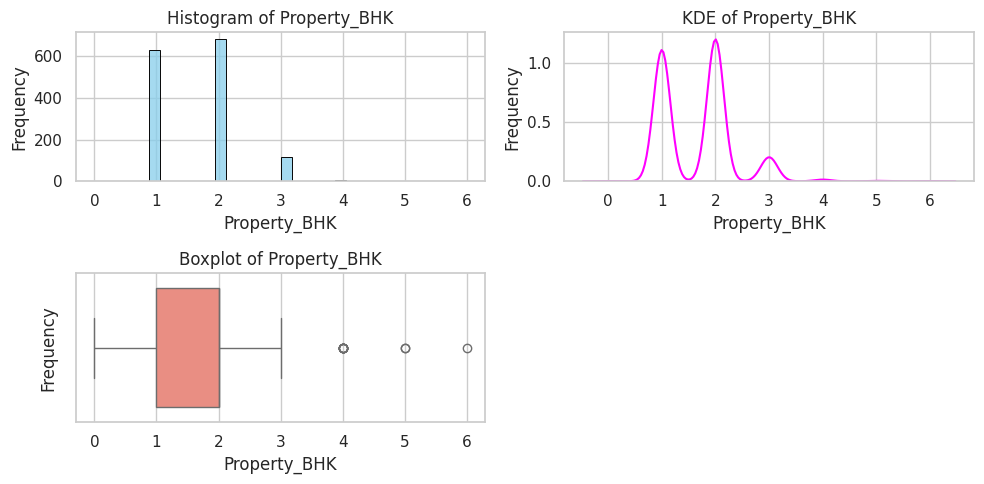

In [53]:
plot_numerical_analysis(numerical_df,'Property_BHK')

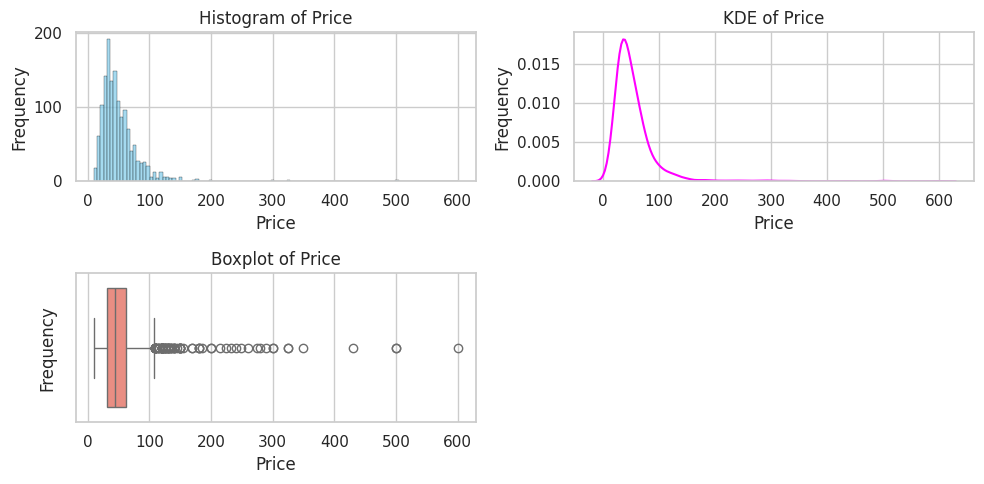

In [54]:
plot_numerical_analysis(numerical_df,'Price')

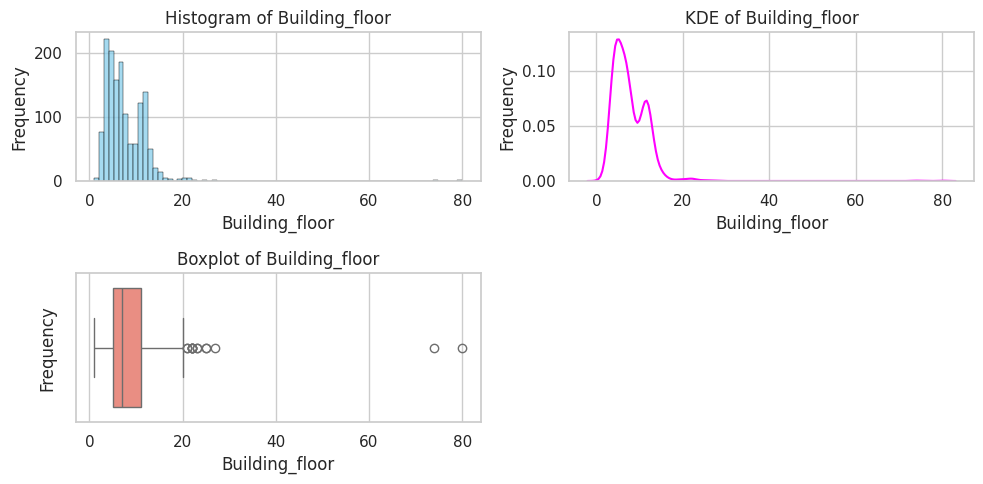

In [55]:
plot_numerical_analysis(numerical_df,'Building_floor')

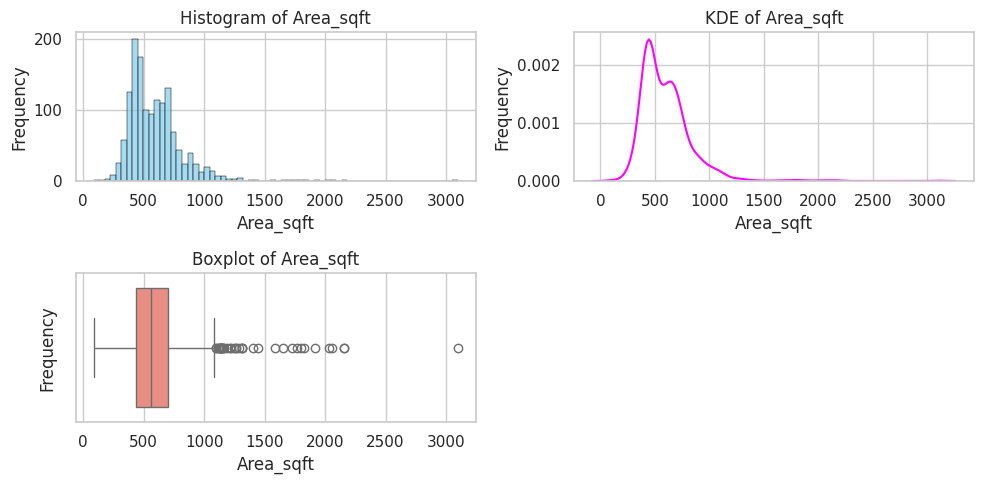

In [56]:
plot_numerical_analysis(numerical_df,'Area_sqft')

**Treating Outliers**

In [57]:
df.skew(numeric_only = True)

,0
Area_sqft,2.658623
Property_BHK,0.874394
Bathroom,0.832460
Price,5.445963
House_floor,1.079040
Building_floor,6.003705


**Univariate - Visual Anlysis of Categorical Columns**

In [58]:
def plot_categorical_analysis(df,column):
    plt.figure(figsize=(18,18))
    # Pie chart - by using pandas functions
    plt.subplot(3,1,2)
    df[column].value_counts().nlargest(10).plot.pie(autopct = '%1.1f%%',color =sns.color_palette('Set2'))
    plt.title(f' Pie chartt of {column}')
    plt.tight_layout()
    plt.show()

In [59]:
cat_df.columns

Index(['Furnished_Status', 'Society', 'Status', 'Area_Range',
       'Floor_Category'],
      dtype='object')

,0
Area_sqft,"Axes(0.125,0.712609;0.352273x0.167391)"
Property_BHK,"Axes(0.547727,0.712609;0.352273x0.167391)"
Bathroom,"Axes(0.125,0.511739;0.352273x0.167391)"
Price,"Axes(0.547727,0.511739;0.352273x0.167391)"
House_floor,"Axes(0.125,0.31087;0.352273x0.167391)"
Building_floor,"Axes(0.547727,0.31087;0.352273x0.167391)"


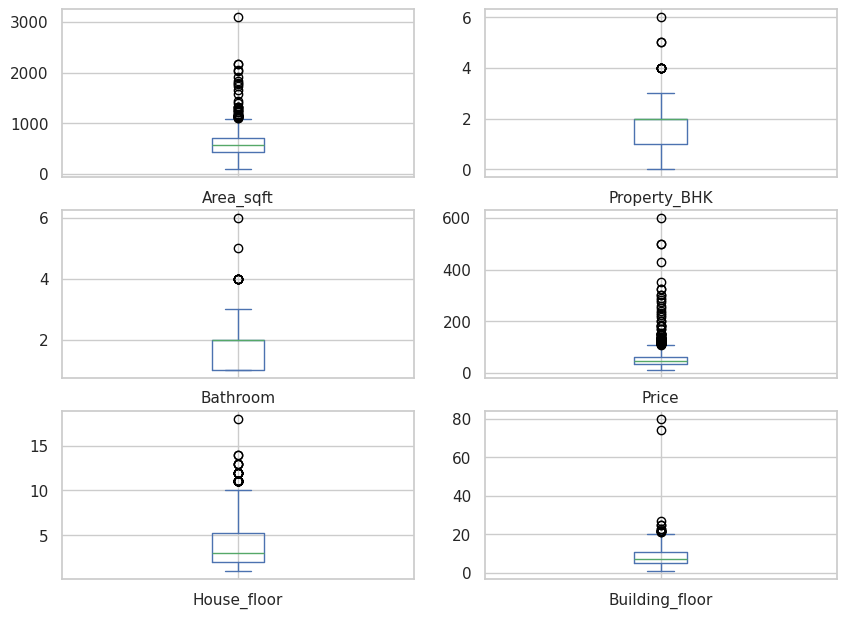

In [60]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

In [61]:
def replace_outliers_with_mean(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mean_val = df[(df[column] >= low) & (df[column] <= high)][column].mean()
    df[column] = df[column].apply(lambda x: mean_val if x < low or x > high else x)
    return df


In [62]:
col=['Bathroom','Property_BHK','Building_floor']
for column in col:
  df = replace_outliers_with_mean(df,column)

,0
Area_sqft,"Axes(0.125,0.712609;0.352273x0.167391)"
Property_BHK,"Axes(0.547727,0.712609;0.352273x0.167391)"
Bathroom,"Axes(0.125,0.511739;0.352273x0.167391)"
Price,"Axes(0.547727,0.511739;0.352273x0.167391)"
House_floor,"Axes(0.125,0.31087;0.352273x0.167391)"
Building_floor,"Axes(0.547727,0.31087;0.352273x0.167391)"


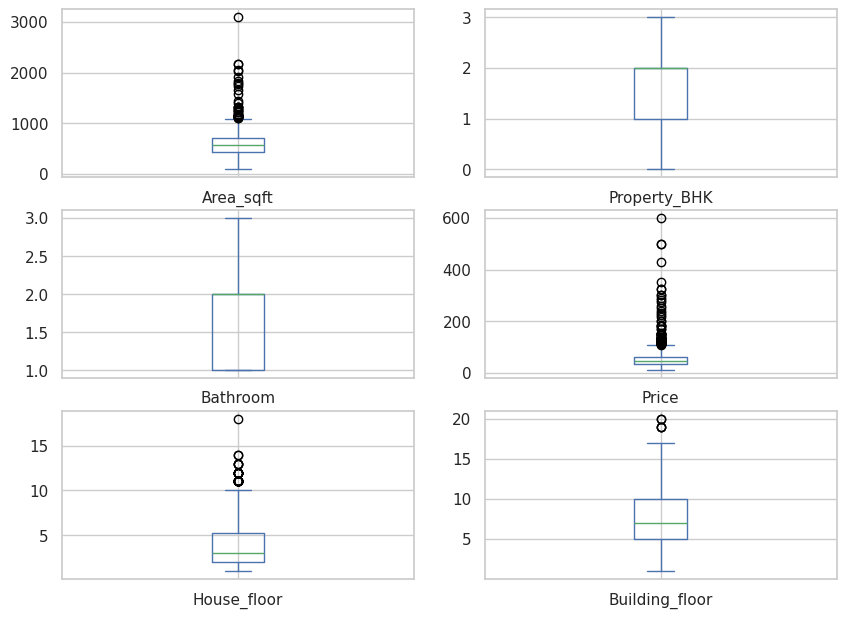

In [63]:
df.plot(kind='box', subplots=True, layout=(4, 2), figsize=(10, 10))

**outliers**

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

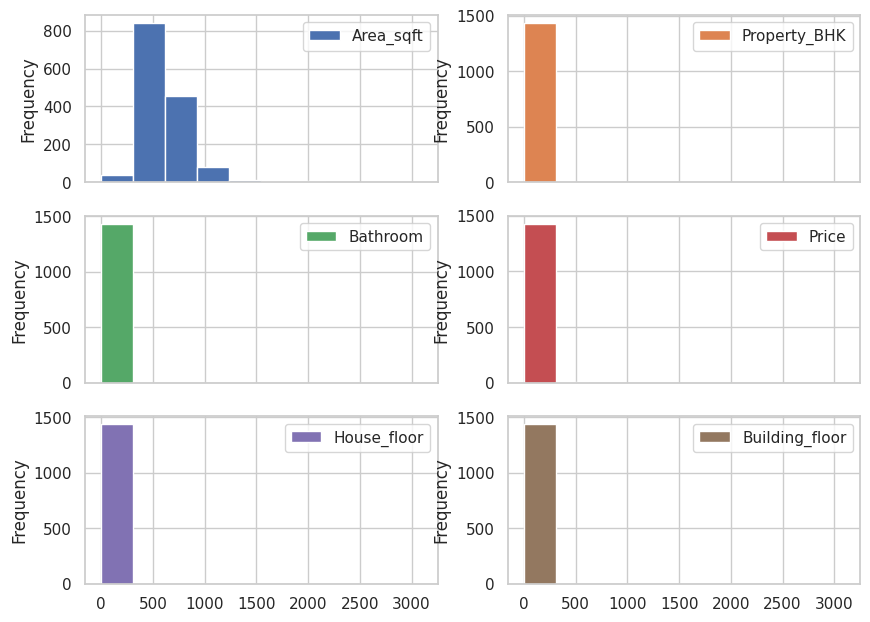

In [64]:
df.plot(kind='hist', subplots=True, layout=(4, 2), figsize=(10, 10))

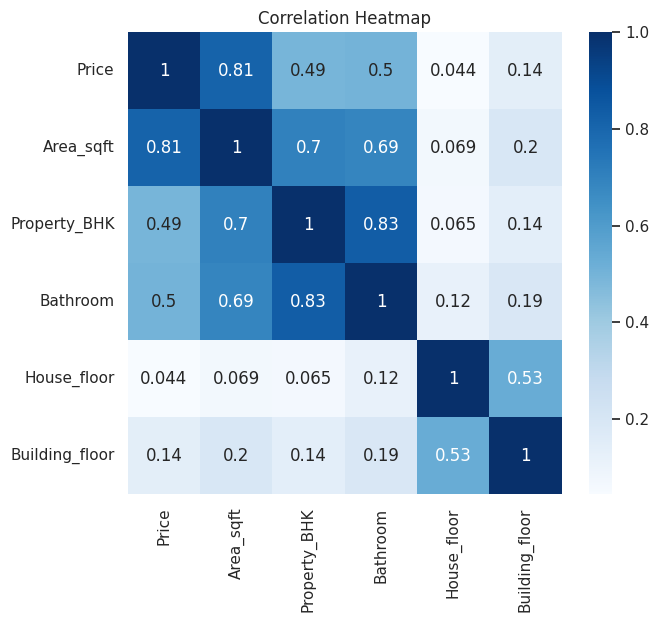

In [65]:
plt.figure(figsize=(7, 6))
sns.heatmap(df[['Price', 'Area_sqft', 'Property_BHK', 'Bathroom', 'House_floor', 'Building_floor']].corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

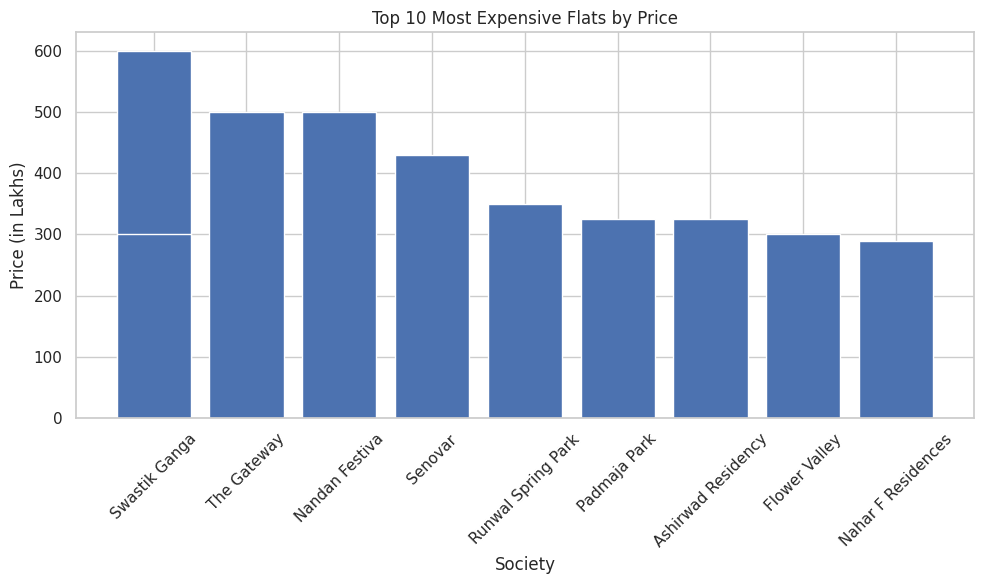

In [66]:
import matplotlib.pyplot as plt

# Get top 10 most expensive flats
top_10_flats = df[['Society', 'Price']].sort_values(by='Price', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_10_flats['Society'], top_10_flats['Price'])
plt.title("Top 10 Most Expensive Flats by Price")
plt.xlabel("Society")
plt.ylabel("Price (in Lakhs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [67]:
df[df['Society'] == 'Swaraj Complex']

,Area_sqft,Property_BHK,Furnished_Status,Bathroom,Society,Price,Status,House_floor,Building_floor,Price_Range,Area_Range,Floor_Category
1498,491.0,1.0,Unfurnished,1.0,Swaraj Complex,32,Ready to Move,1,7.0,30-60L,400-600 sqft,Low


In [68]:
df['Price'].max()

600

In [69]:
df[df['Price'] == df['Price'].max()]['Society']


,Society
848,Swastik Ganga


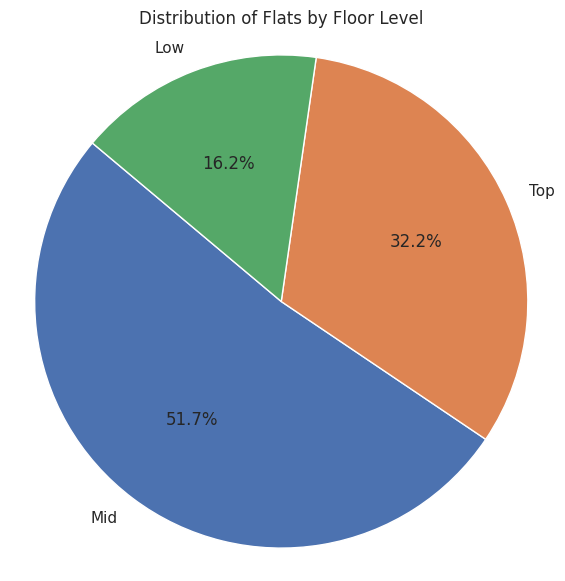

In [70]:
import matplotlib.pyplot as plt

# Count each floor category
floor_counts = df['Floor_Category'].value_counts()

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(floor_counts, labels=floor_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Flats by Floor Level')
plt.axis('equal')  # Equal aspect ratio to make the pie circular
plt.show()

<Axes: xlabel='Price', ylabel='Property_BHK'>

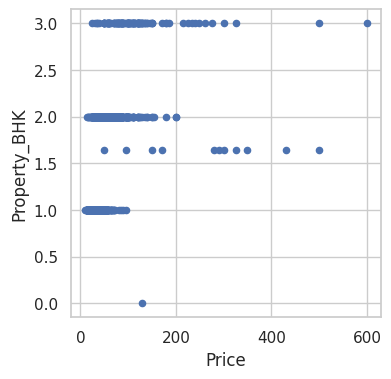

In [71]:
df.plot(kind='scatter', x='Price', y='Property_BHK', figsize=(4, 4))

<Axes: xlabel='Price', ylabel='House_floor'>

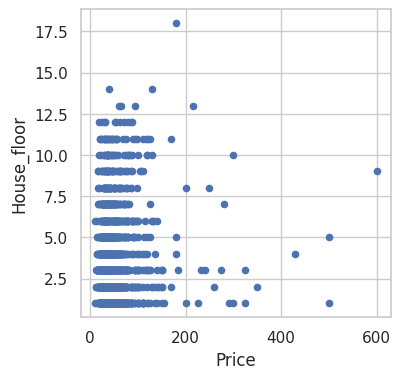

In [72]:
df.plot(kind='scatter', x='Price', y='House_floor', figsize=(4, 4))

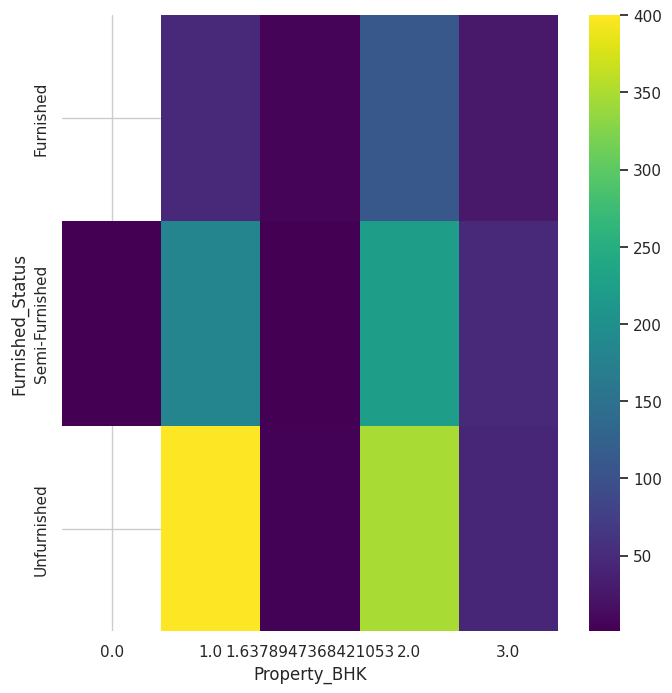

In [73]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Furnished_Status'].value_counts()
    for x_label, grp in df.groupby('Property_BHK')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Property_BHK')
_ = plt.ylabel('Furnished_Status')
plt.show()


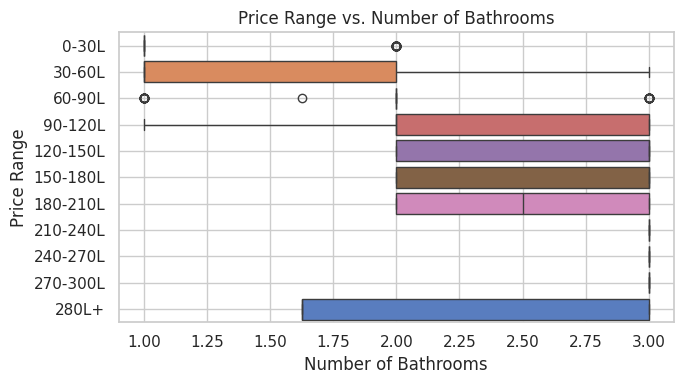

In [74]:
plt.figure(figsize=(7, 4))
sns.boxplot(data=df, x='Bathroom', y='Price_Range', palette='muted')
plt.title('Price Range vs. Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price Range')
plt.grid(True)
plt.tight_layout()
plt.show()

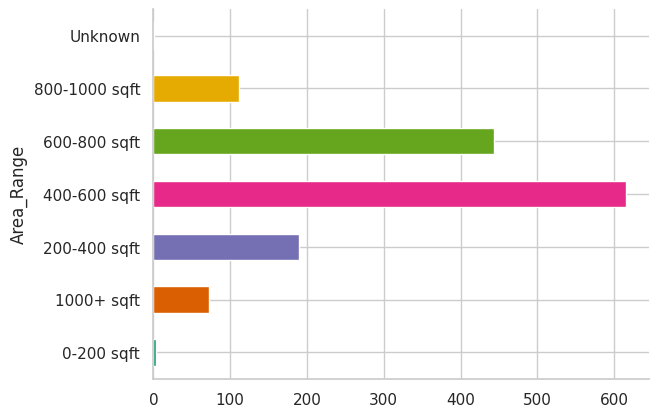

In [75]:
# @title Area_Range

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Area_Range').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

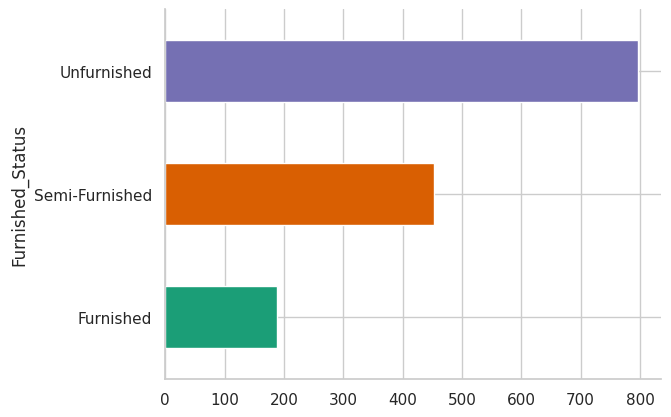

In [76]:
# @title Furnished_Status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Furnished_Status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

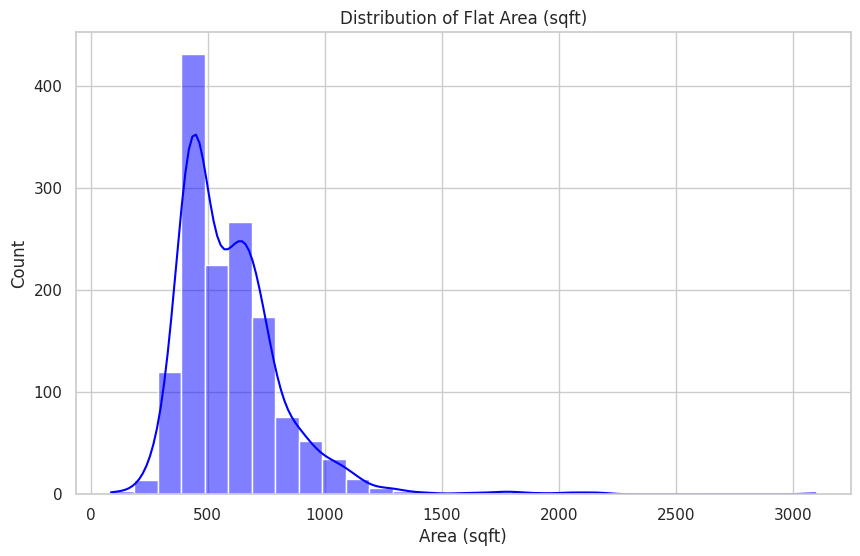

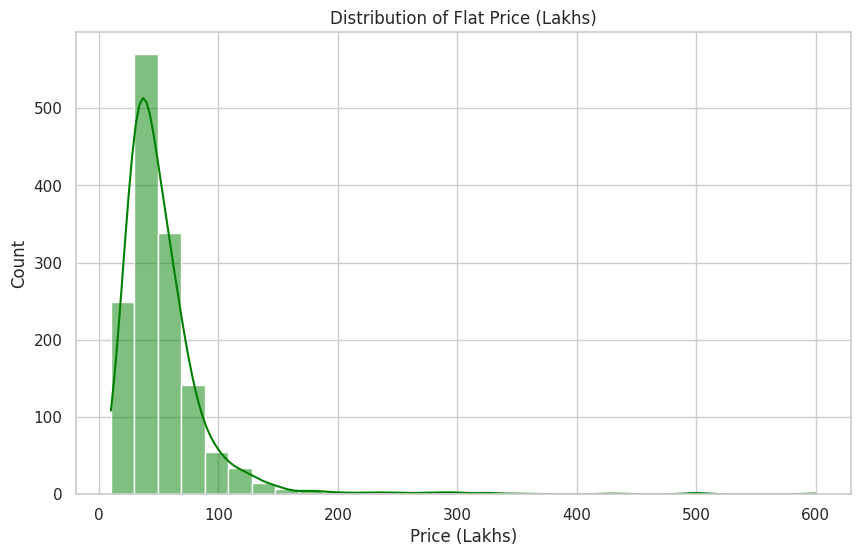

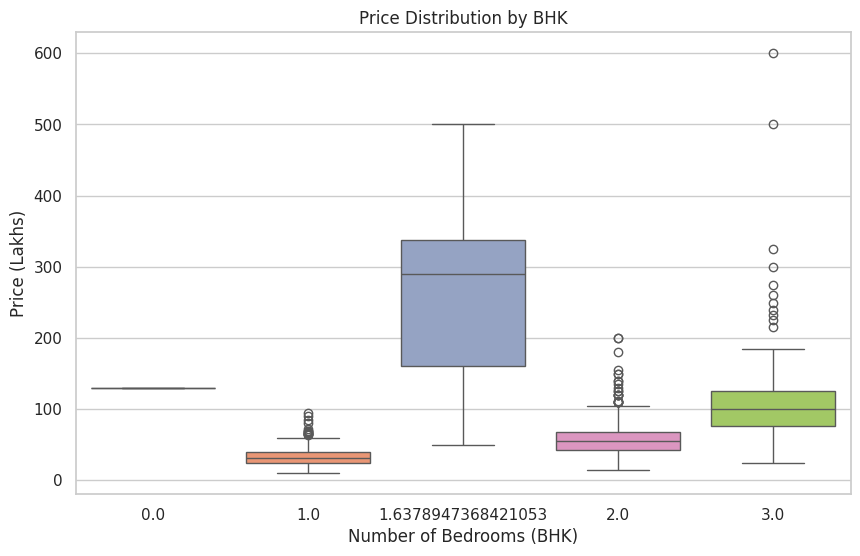

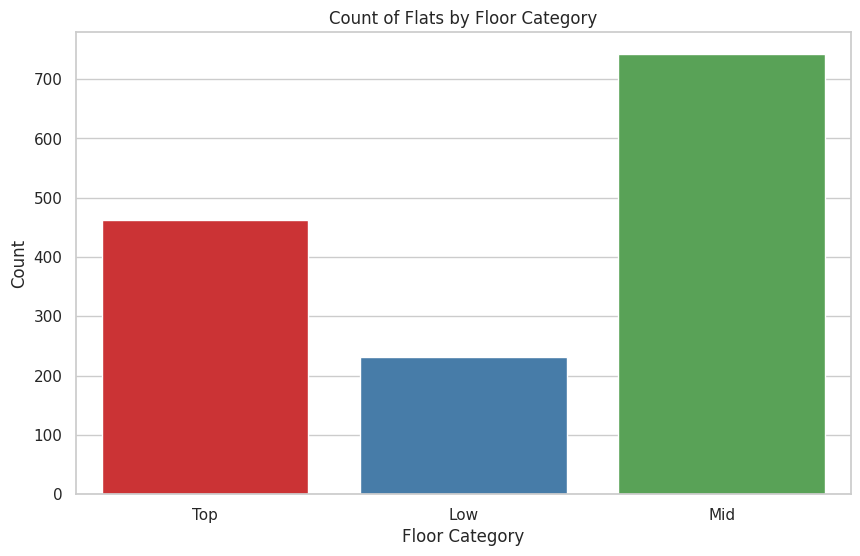

In [77]:
sns.set(style="whitegrid")

# 1. Histogram of Area
plt.figure(figsize=(10, 6))
sns.histplot(df['Area_sqft'], bins=30, kde=True, color='blue')
plt.title('Distribution of Flat Area (sqft)')
plt.xlabel('Area (sqft)')
plt.ylabel('Count')
plt.show()

# 2. Histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='green')
plt.title('Distribution of Flat Price (Lakhs)')
plt.xlabel('Price (Lakhs)')
plt.ylabel('Count')
plt.show()

# 3. Box plot of Price by Property_BHK
plt.figure(figsize=(10, 6))
sns.boxplot(x='Property_BHK', y='Price', data=df, palette='Set2')
plt.title('Price Distribution by BHK')
plt.xlabel('Number of Bedrooms (BHK)')
plt.ylabel('Price (Lakhs)')
plt.show()

# 4. Bar plot of Floor_Category counts
plt.figure(figsize=(10, 6))
sns.countplot(x='Floor_Category', data=df, palette='Set1')
plt.title('Count of Flats by Floor Category')
plt.xlabel('Floor Category')
plt.ylabel('Count')
plt.show()

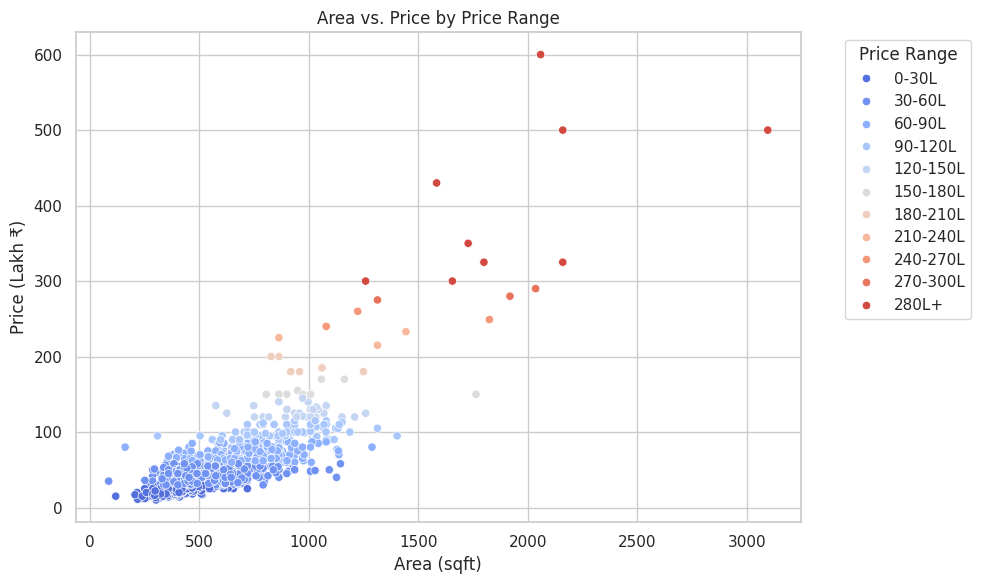

In [78]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area_sqft', y='Price', hue='Price_Range', palette='coolwarm')
plt.title('Area vs. Price by Price Range')
plt.xlabel('Area (sqft)')
plt.ylabel('Price (Lakh ₹)')
plt.legend(title='Price Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [79]:
df.shape

(1436, 12)